### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [217]:
data = pd.read_csv('data/coupons.csv')

In [218]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [219]:
#Let's understand the dataset - LEt's see how many rows, columns are present
#data.info()
#The above code gives us 12684 rows and 26 columns


#First, let's check to see how many columns have NAN in the whole data set
data_null_count = data.isnull().sum()
print(data_null_count)



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [220]:
#From the investigated data, the car column is pretty much useless. It only has 108 values populated.
#So, as a first step, get rid of the car column
data = data.drop(['car'],axis = 1)

#For coffee house and Bar, let's populate 'Not Specified' for NAN. We don't want to lose rows unnecessarily
data['Bar'].fillna('Not_Specified', inplace=True)
data['CoffeeHouse'].fillna('Not_Specified', inplace=True)
data_null_count = data.isnull().sum()

#For the remaining nan's, simply delete the nan rows. This way we have a dataset without any missing values.
data = data.dropna()
data_null_count = data.isnull().sum()
print(data_null_count)

data.info()
#At this point, the data is clean and ready to use.
#12298 rows and 25 columns!!

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12298 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12298 non-null  object
 1   passanger             12298 non-null  object
 2   weather               

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
total_observations = data.shape[0]
print("Total_observations ",total_observations)
accept_coupon = data[data['Y'] == 1].shape[0]
print("Total_accepted_coupon ",accept_coupon)

percent_accept = (accept_coupon/total_observations)*100
print("Percentage of coupons accepted is",percent_accept)

Total_observations  12298
Total_accepted_coupon  6973
Percentage of coupons accepted is 56.700276467718325


5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Bar'),
 Text(3, 0, 'Carry out & Take away'),
 Text(4, 0, 'Restaurant(20-50)')]

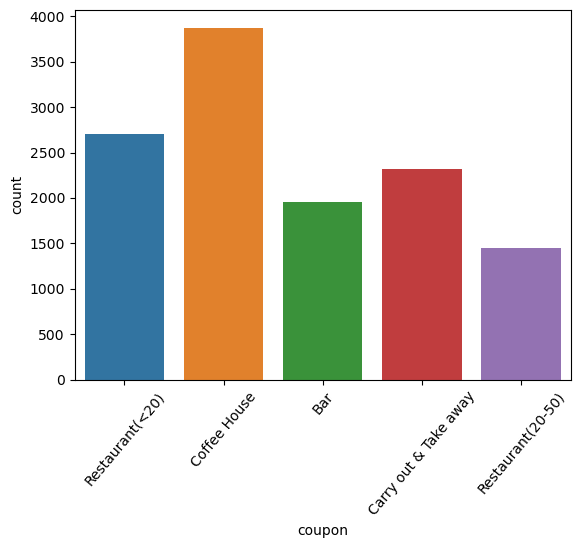

In [7]:
#The objective here is to try and get a breakdown of the number of coupons that were accepted
myplot = sns.countplot(x='coupon',data=data)
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=50)


[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Bar'),
 Text(3, 0, 'Carry out & Take away'),
 Text(4, 0, 'Restaurant(20-50)')]

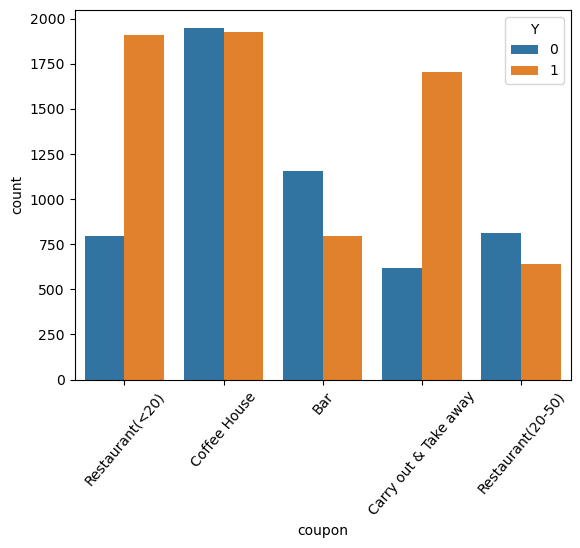

In [8]:
#USe the hue='Y' to understand how many people accepted the offered coupons
myplot = sns.countplot(x='coupon',data=data,hue='Y')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=50)

6. Use a histogram to visualize the temperature column.

22    55
23    80
24    80
25    80
26    80
27    80
28    80
29    80
30    80
31    80
Name: temperature, dtype: int64


<Axes: xlabel='temperature', ylabel='Count'>

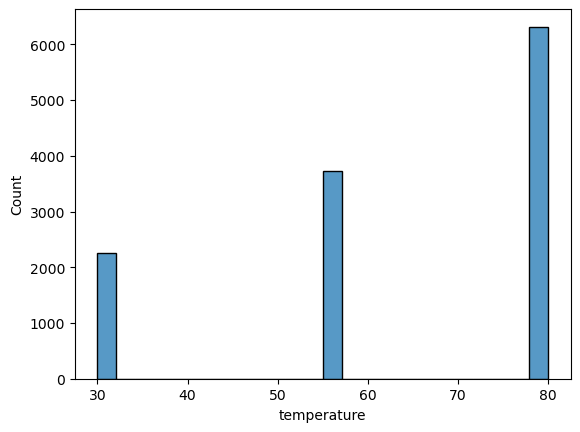

In [9]:
data1 = data['temperature']
print(data1.head(10))
sns.histplot(data = data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [216]:
bar_data = data[data['coupon'] == 'Bar']
bar_total_coupons = bar_data.shape[0]
print("Total number of bar_coupons are ",bar_data.shape[0])


Total number of bar_coupons are  1952


2. What proportion of bar coupons were accepted?


bar coupons accepted is 797
bar coupons accepted percentage is 40.829918032786885


Text(0, 0.5, 'Count of Bar coupons')

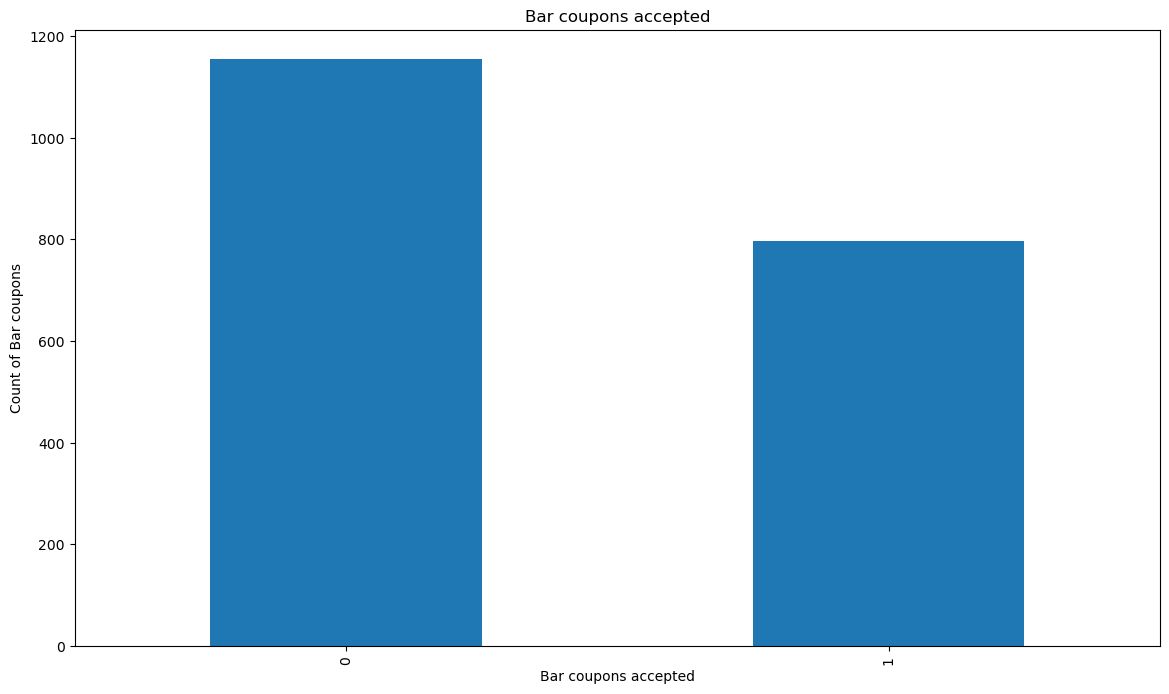

In [246]:
bar_coupons_acc = bar_data[bar_data['Y'] == 1].shape[0]
print("bar coupons accepted is",bar_coupons_acc)

prop_bar_accepted = (bar_coupons_acc/bar_total_coupons) * 100
print("bar coupons accepted percentage is", prop_bar_accepted)
#40.82 percent of bar coupons were accepted.
ax = bar_data['Y'].value_counts().plot(kind='bar',
                                  figsize=(14,8),
                                  title="Bar coupons accepted")
ax.set_xlabel("Bar coupons accepted")
ax.set_ylabel("Count of Bar coupons")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar    Y
1~3    1    245
       0    134
less1  0    315
       1    249
never  0    651
       1    150
Name: Y, dtype: int64
Bar  Y
4~8  1    117
     0     33
gt8  1     33
     0     13
Name: Y, dtype: int64
1744
196
0.36926605504587157
Acceptance of 3 or fewer in pct is  36.92660550458716
Acceptance of 4 or more in pct is 76.53061224489795


Text(0, 0.5, 'Count of Bar coupons')

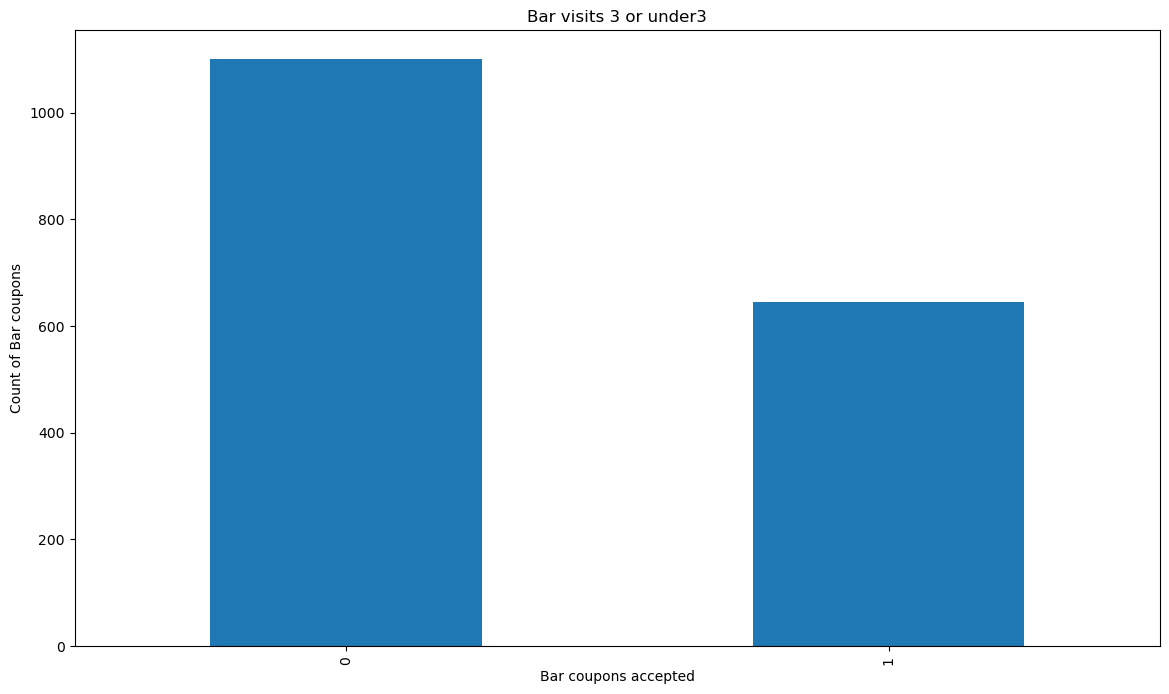

In [252]:
three_or_fewer_options = ['1~3','less1','never']
four_more = ['4~8','gt8']


three_or_under_df = bar_data[bar_data['Bar'].isin(three_or_fewer_options)]
four_or_more_df = bar_data[bar_data['Bar'].isin(four_more)]

acc_three_under = three_or_under_df.groupby('Bar')['Y'].value_counts()
acc_four_over =  four_or_more_df.groupby('Bar')['Y'].value_counts()
total_three_under =  three_or_under_df.groupby('Bar')['Y'].value_counts().sum()
total_four_over = four_or_more_df.groupby('Bar')['Y'].value_counts().sum()


print(acc_three_under)
print(acc_four_over)
print(total_three_under)
print(total_four_over)

#Now sum total of Bar visits 1-3, less1, none gives the percentage
acc_3_fewer = (245+249+150)/(total_three_under)
print(acc_3_fewer)
acc_3_fewer_pct = (acc_3_fewer)*100
print("Acceptance of 3 or fewer in pct is ",acc_3_fewer_pct)

#For those who went more, add 4~8,gt8
acc_4_or_more = (33+117)/(total_four_over)
acc_4_or_more_pct = acc_4_or_more*100
print("Acceptance of 4 or more in pct is",acc_4_or_more_pct)
#for 3 or fewer, count the probability of 1-3, less1, never
#Acceptance of 3 or fewer = 36.92%
#Acceptance of 4 or more = 76.53%
ax = three_or_under_df['Y'].value_counts().plot(kind='bar',
                                                figsize=(14,8),
                                                title="Bar visits 3 or under3")
ax.set_xlabel("Bar coupons accepted")
ax.set_ylabel("Count of Bar coupons")



Text(0, 0.5, 'Count of Bar coupons')

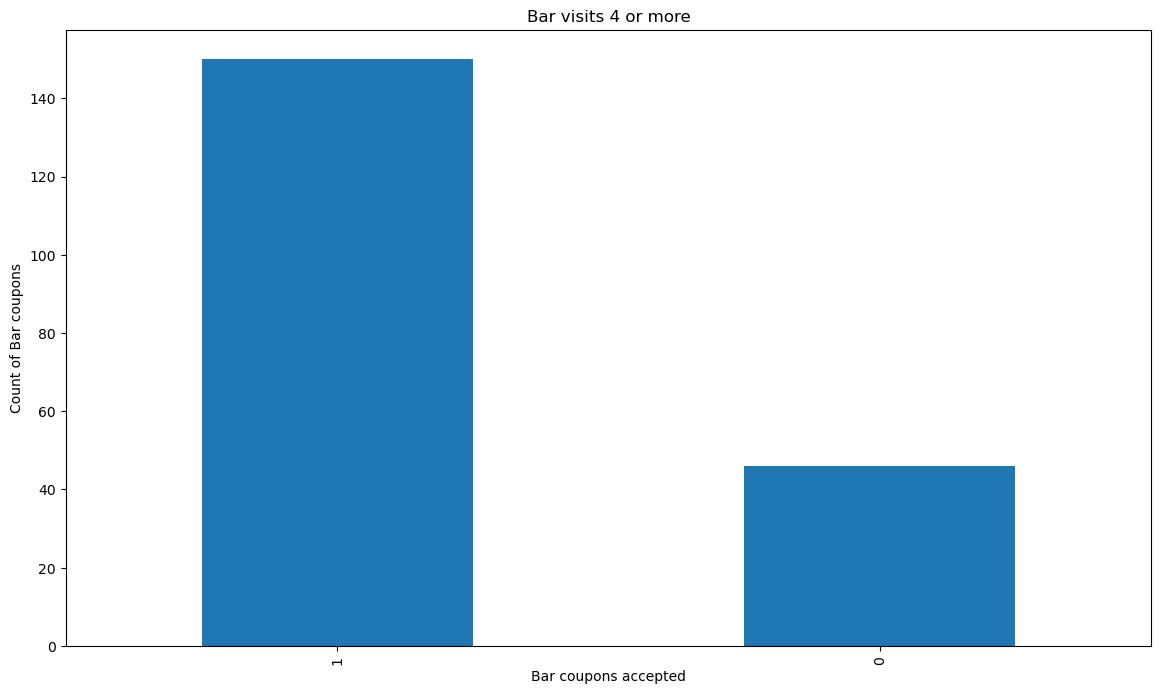

In [253]:
ax = four_or_more_df['Y'].value_counts().plot(kind='bar',
                                              figsize=(14,8),
                                              title="Bar visits 4 or more")
ax.set_xlabel("Bar coupons accepted")
ax.set_ylabel("Count of Bar coupons")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Total_acc num is  406
Total acc yes count is* 281
Acc rate for age25+people with min bar is  69.21182266009852
Bar  Y
1~3  1    176
     0     94
4~8  1     84
     0     22
gt8  1     21
     0      9
Name: Y, dtype: int64
575
all_age_acc percentage is 48.869565217391305


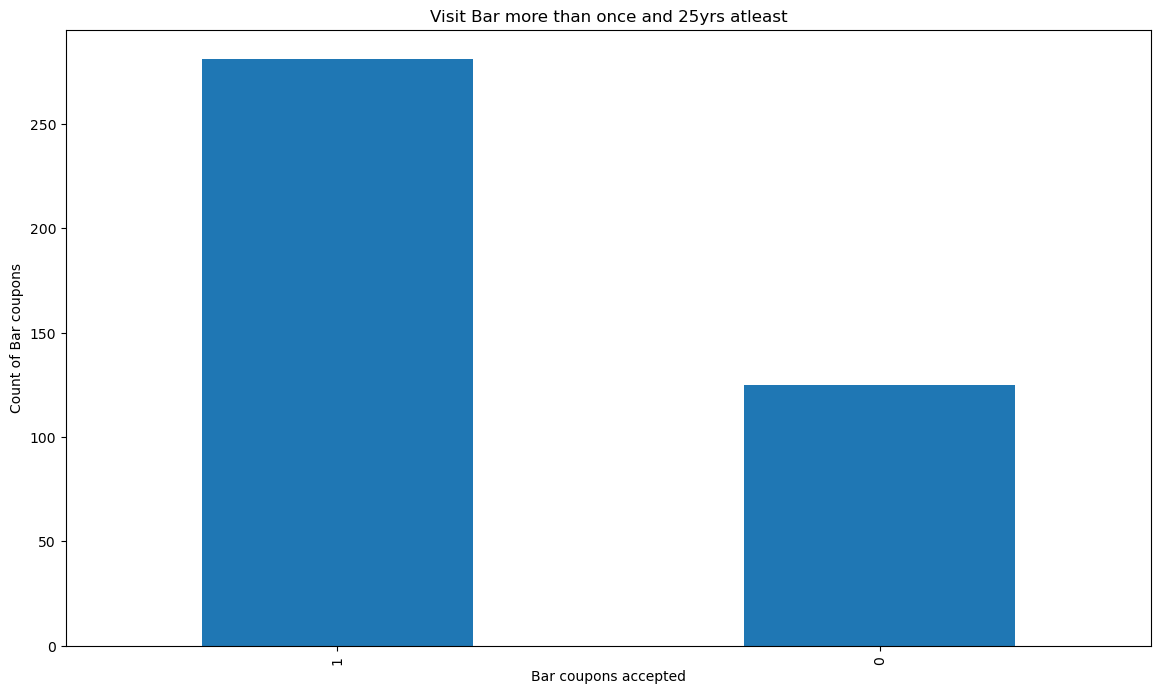

In [258]:
#Let's get a filtered data set that contains only the columns we need
flt_bar_data = bar_data[['coupon','age','Y','Bar']]
options = ['1~3','4~8','gt8']
#print(flt_bar_data.head(5))
#Here we have to convert the age column to int, but looks like the age has 50plus.
#Convert the 50plus to 50
flt_bar_data1 = flt_bar_data.replace(to_replace =['50plus','below21'],value=[51,20])
#print(flt_bar_data1.tail(30))
#Now convert the age from Object to int
flt_bar_data1['age'] = flt_bar_data1['age'].astype(int)
#print(opt_data1.head(20))
option_data = flt_bar_data1[flt_bar_data1['Bar'].isin(options)]
option_data1 = option_data[option_data['age']>25]
#print(option_data1.head(50))
option_data2 = option_data1.groupby('Bar')['Y'].value_counts()
#print(option_data2)
total_acceptance_num =  option_data1.groupby('Bar')['Y'].value_counts().sum()
total_acceptance_yes = 176 + 84 + 21
print("Total_acc num is ",total_acceptance_num)
print("Total acc yes count is*",total_acceptence_yes)
#Now get the percentage and the total sample size
acceptance_rate = (total_acceptance_yes/total_acceptance_num)*100
print("Acc rate for age25+people with min bar is ",acceptance_rate)
ax = option_data1['Y'].value_counts().plot(kind='bar',
                                              figsize=(14,8),
                                              title="Visit Bar more than once and 25yrs atleast")
ax.set_xlabel("Bar coupons accepted")
ax.set_ylabel("Count of Bar coupons")
#The next comparison I am trying to do is 
#People who go to the bar more than once but no age limit
#There is no 25 year old age limit
no_age_df = option_data1.groupby('Bar')['Y'].value_counts()
print(no_age_df)
no_age_limit_df_total = option_data.groupby('Bar')['Y'].value_counts().sum()
print(no_age_df_total)
all_age_acc = (total_acceptance_yes/no_age_limit_df_total)*100
print("all_age_acc percentage is",all_age_acc)

#Basically there is a 21% increase because of adding a 25 year old age limit
#With 25 year old age limit acceptance rate is 69%, without 48%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [259]:
bar_data_filter = bar_data[['coupon','age','Y','Bar','passanger','occupation']]
bar_options = ['1~3','4~8','gt8']
bar_options_data = bar_data_filter[bar_data_filter['Bar'].isin(bar_options)]
#print(bar_options_data.info())
kid_option = ['Kid(s)']
bar_options_data_no_kid = bar_options_data[~bar_options_data['passanger'].isin(kid_option)]
#print(bar_options_data_no_kid.info())
#print(bar_options_data_no_kid.head(20))
occ_options = ['farming','fishing','forestry']
occ_filter = bar_options_data_no_kid[~bar_options_data_no_kid['occupation'].isin(occ_options)]
occ_filter_grp = occ_filter.groupby('Bar')['Y'].value_counts()
print(occ_filter_grp)
total_count = occ_filter.groupby('Bar')['Y'].value_counts().sum()
print(total_count)
yes_count = 234+113+32
total_acc_rate = (yes_count/total_count)*100
print(total_acc_rate)

#The acceptance rate for this case is 71.1%

Bar  Y
1~3  1    234
     0    111
4~8  1    113
     0     30
gt8  1     32
     0     13
Name: Y, dtype: int64
533
71.10694183864915


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [117]:
#Let's do the calculations for the below
#1. go to bars more than once a month, had passengers that were not a kid, and were not widowed 
data1 = data[data['maritalStatus'] == 'Widowed']
#We know from the above info that 108 entries exist for the Widowed

#data1.info()
bar_data_filter = bar_data[['coupon','age','Y','Bar','passanger','maritalStatus']]
bar_options = ['1~3','4~8','gt8']
bar_options_data = bar_data_filter[bar_data_filter['Bar'].isin(bar_options)]
#print(bar_options_data.info())
kid_option = ['Kid(s)']
bar_options_data_no_kid = bar_options_data[~bar_options_data['passanger'].isin(kid_option)]
#print(bar_options_data_no_kid.head(80))
marital_option = ['Widowed']
bar_data_no_kid_not_widowed = bar_options_data_no_kid[~bar_options_data_no_kid['maritalStatus'].isin(marital_option)]
#bar_data_no_kid_not_widowed.info()


filter_grp =  bar_data_no_kid_not_widowed.groupby('Bar')['Y'].value_counts()
print(filter_grp)
total_count = occ_filter.groupby('Bar')['Y'].value_counts().sum()
print(total_count)
yes_count = 234+113+32
total_acc_rate = (yes_count/total_count)*100
print(total_acc_rate)

#The acceptance rate is still 71.1%

#Lets try to next find this data - Go to the bar more than once a month and are under the age of 30


Bar  Y
1~3  1    234
     0    111
4~8  1    113
     0     30
gt8  1     32
     0     13
Name: Y, dtype: int64
533
71.10694183864915


In [126]:
#Lets try to next find this data - Go to the bar more than once a month and are under the age of 30

flt_bar_data = bar_data[['coupon','age','Y','Bar']]
options = ['1~3','4~8','gt8']
print(flt_bar_data.head(5))
#Here we have to convert the age column to int, but looks like the age has 50plus.
#Convert the 50plus to 50
flt_bar_data1 = flt_bar_data.replace(to_replace =['50plus','below21'],value=[51,20])
#print(flt_bar_data1.tail(30))
#Now convert the age from Object to int
flt_bar_data1['age'] = flt_bar_data1['age'].astype(int)
#print(opt_data1.head(20))
option_data = flt_bar_data1[flt_bar_data1['Bar'].isin(options)]
option_data1 = option_data[option_data['age']<30]
#print(option_data1.head(50))
option_data2 = option_data1.groupby('Bar')['Y'].value_counts()
print(option_data2)
total_acceptance_num =  option_data1.groupby('Bar')['Y'].value_counts().sum()
acceptance_yes = 132+80+27
print("Total_acc num is ",total_acceptance_num)
print("Total acc yes count is*",acceptance_yes)
#Now get the percentage and the total sample size
acceptance_rate = (acceptance_yes/total_acceptance_num)*100
print("Acc rate for age30 under people with min bar is ",acceptance_rate)
#Thus if we limit the ages to under 30, the acceptance percentage goes up to 72.2%

   coupon age  Y    Bar
24    Bar  21  1  never
35    Bar  21  1  never
39    Bar  21  1  never
46    Bar  46  0  never
57    Bar  46  0  never
Bar  Y
1~3  1    132
     0     66
4~8  1     80
     0     19
gt8  1     27
     0      7
Name: Y, dtype: int64
Total_acc num is  331
Total acc yes count is* 239
Acc rate for age30 under people with min bar is  72.20543806646525


In [184]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_rest_data = data
cheap_rest_data1 = cheap_rest_data[cheap_rest_data['coupon'] == 'Restaurant(<20)']
income_opt =['$12500 - $24999','$25000 - $37499','$37500 - $49999']
#We have 386 entrues where coupon is Restaurant<20 and salary less than 50000
#cheap_rest_data_income_filter.head(5)


cheap_rest_data_income_filter = cheap_rest_data1[cheap_rest_data1['income'].isin(income_opt)]
cheap_rest_data_income_filter.info()
rest_opt = ['4~8','gt8']
req_data_filter = cheap_rest_data_income_filter[cheap_rest_data_income_filter['RestaurantLessThan20'].isin(rest_opt)]
y = req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts()
print(y)

total_Acc =  req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts().sum()
print(total_Acc)
yes_acc = 181+90
acc_Rate = (yes_acc/total_Acc)*100
print(acc_Rate)
#Acc rate is around 70%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 44 to 12628
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1199 non-null   object
 1   passanger             1199 non-null   object
 2   weather               1199 non-null   object
 3   temperature           1199 non-null   int64 
 4   time                  1199 non-null   object
 5   coupon                1199 non-null   object
 6   expiration            1199 non-null   object
 7   gender                1199 non-null   object
 8   age                   1199 non-null   object
 9   maritalStatus         1199 non-null   object
 10  has_children          1199 non-null   int64 
 11  education             1199 non-null   object
 12  occupation            1199 non-null   object
 13  income                1199 non-null   object
 14  Bar                   1199 non-null   object
 15  CoffeeHouse           1199 non-null 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Basically drivers who acceptred the bar coupons were generally the folks who would go to the Bar 
#atleast more than once and under the age of 30

#Also generally people who would go to the Bar more than once were so much more likelier to 
#accept the bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [207]:
#Accepting - coupontype Restaurant(<20) more than 4 times a month and income is less than 25K.
cheap_rest_data = data
cheap_rest_data1 = cheap_rest_data[cheap_rest_data['coupon'] == 'Restaurant(<20)']
income_opt =['$12500 - $24999']

cheap_rest_data_income_filter = cheap_rest_data1[cheap_rest_data1['income'].isin(income_opt)]
rest_opt = ['4~8','gt8']
req_data_filter = cheap_rest_data_income_filter[cheap_rest_data_income_filter['RestaurantLessThan20'].isin(rest_opt)]
y = req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts()
print(y)

total_Acc =  req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts().sum()
print(total_Acc)
yes_acc = 54+26
acc_Rate = (yes_acc/total_Acc)*100
print(acc_Rate)
#Acc rate is 63%. So acceptance rate actually reduced.


#Accepting - coupontype Restaurant(<20) more than 4 times a month - lets have no limit on the income

cheap_rest_data = data
cheap_rest_data1 = cheap_rest_data[cheap_rest_data['coupon'] == 'Restaurant(<20)']

rest_opt1 = ['4~8','gt8']
req_data_filter = cheap_rest_data1[cheap_rest_data1['RestaurantLessThan20'].isin(rest_opt)]
y = req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts()
print(y)

total_Acc =  req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts().sum()
print(total_Acc)
yes_acc = 556+219
acc_Rate = (yes_acc/total_Acc)*100
print(acc_Rate)
#Acceptance rate is 72.83

#Accepting - coupontype Restaurant(<20) more than 4 times a month - lets have income is >50K but less than 75K
cheap_rest_data = data
cheap_rest_data1 = cheap_rest_data[cheap_rest_data['coupon'] == 'Restaurant(<20)']
income_opt =['$50000 - $62499','$62500 - $74999']

cheap_rest_data_income_filter = cheap_rest_data1[cheap_rest_data1['income'].isin(income_opt)]
rest_opt = ['4~8','gt8']
req_data_filter = cheap_rest_data_income_filter[cheap_rest_data_income_filter['RestaurantLessThan20'].isin(rest_opt)]
y = req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts()
print(y)

total_Acc =  req_data_filter.groupby('RestaurantLessThan20')['Y'].value_counts().sum()
print(total_Acc)
yes_acc = 129+41
acc_Rate = (yes_acc/total_Acc)*100
print(acc_Rate)
#76.92

RestaurantLessThan20  Y
4~8                   1    54
                      0    33
gt8                   1    26
                      0    14
Name: Y, dtype: int64
127
62.99212598425197
RestaurantLessThan20  Y
4~8                   1    556
                      0    220
gt8                   1    219
                      0     69
Name: Y, dtype: int64
1064
72.83834586466166
RestaurantLessThan20  Y
4~8                   1    129
                      0     39
gt8                   1     41
                      0     12
Name: Y, dtype: int64
221
76.92307692307693
